In [3]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq, readseq, match_hist
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from corrLib import density_fluctuation
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib as mpl
import pandas as pd

#### Figure 1 - experiment
* Raw image from microscopy
* <del>Spatial intensity variation</del>
* PIV overlay
* Correlation between velocity magnitude and light intensity

(-0.5, 2047.5, 2047.5, -0.5)

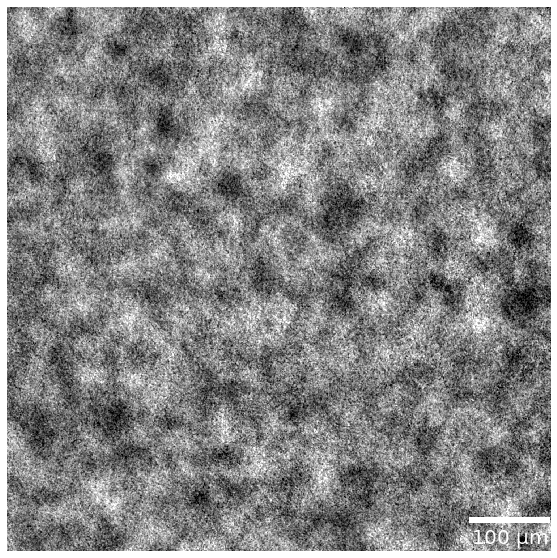

In [6]:
# Load raw image
%matplotlib inline
imgDir = r'I:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\80-900.tif'
img = io.imread(imgDir)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img, cmap='gray')
scalebar = ScaleBar(0.33, 'um', SI_LENGTH, frameon=False, color='white', font_properties={'size': 20},
                   pad=0, location='lower right', fixed_value=100) # 1 pixel = 0.2 1/cm
ax.add_artist(scalebar)
plt.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

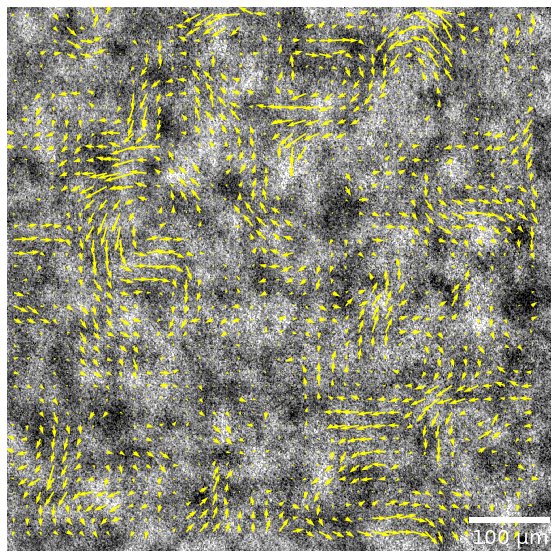

In [7]:
# PIV overlay, make arrows sparcer
pivData = pd.read_csv(r'D:\Wei\Dynamics_raw\piv_result_50\80\900-901.csv')
col = len(pivData.x.drop_duplicates())
row = len(pivData.y.drop_duplicates())
x = np.array(pivData.x).reshape(row, col)
y = np.array(pivData.y).reshape(row, col)
u = np.array(pivData.u).reshape(row, col)
v = np.array(pivData.v).reshape(row, col)
xs = x[0:row:2, 0:col:2]
ys = y[0:row:2, 0:col:2]
us = u[0:row:2, 0:col:2]
vs = v[0:row:2, 0:col:2]

# make quiver plot
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img, cmap='gray')
ax.quiver(xs, ys, us, vs, color='yellow', width=0.003)
scalebar = ScaleBar(0.33, 'um', SI_LENGTH, frameon=False, color='white', font_properties={'size': 20},
                   pad=0, location='lower right', fixed_value=100) # 1 pixel = 0.2 1/cm
ax.add_artist(scalebar)
plt.axis('off')